# Research assignment 4


Camellia Haghverdian

Loan Repayment, State Grants, and Acceptance Rate

03/15/2024

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

For this assignment, I've woked with y_lo_inc_rpy (low income repayment) as my dependent variable, and sgrnt_low_~c (student grant for low income students) as my independent interval ratio variable. For interactions, I added a third interval ratio independent variable, acceptrate (college acceptance rate), which I turned into a nominal variable.

I think the more grants low income students receive, the more likely they are to pay back their student loans. In addition, I assume that the acceptance rate of universities determines the amount of student grants the universities receive. 

This is because the schools with more grants usually have low acceptance rates and students in such schools, given that they are from low income families, have to pay back bigger portions of student debt (Hamilton, Laura T. and Kelly Nielsen. 2021. Broke: The Racial Consequences of Underfunding Public Universities. Chicago: The University of Chicago Press).

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values.

In [1]:
insheet using "/Users/camellia/Documents/Stats 2/soc211_assignments/Week 8/loanrepay2013_highestresearch.csv"
eststo clear

(19 vars, 33 obs)


In [2]:
codebook y_lo_inc_rpy sgrnt_low_~c acceptrate


-------------------------------------------------------------------------------
y_lo_inc_rpy                                                       Y_lo_inc_rpy
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [47.9304,78.4337]             Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 66.2211
             Std. dev.: 8.30001

           Percentiles:     10%       25%       50%       75%       90%
                        56.1845   60.4167   67.2012   73.6202   75.6098

-------------------------------------------------------------------------------
sgrnt_low_inc                                                       (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [438.66541,31988.313]         Units: .00001
         Unique values:

In [3]:
tab acceptrate, missing


 acceptrate |      Freq.     Percent        Cum.
------------+-----------------------------------
    .214635 |          1        3.03        3.03
    .228407 |          1        3.03        6.06
   .3206216 |          1        3.03        9.09
   .3395534 |          1        3.03       12.12
   .3987971 |          1        3.03       15.15
   .3991674 |          1        3.03       18.18
   .4189757 |          1        3.03       21.21
   .4269711 |          1        3.03       24.24
   .4531918 |          1        3.03       27.27
   .4872242 |          1        3.03       30.30
   .4924802 |          1        3.03       33.33
   .4995829 |          1        3.03       36.36
   .5001475 |          1        3.03       39.39
   .5190052 |          1        3.03       42.42
   .5257108 |          1        3.03       45.45
   .5543631 |          1        3.03       48.48
   .5946137 |          1        3.03       51.52
   .6090856 |          1        3.03       54.55
   .6095234 |      

In [4]:
*drop collegeacceptance
gen collegeacceptance=.

replace collegeacceptance=1 if acceptrate>=0 & acceptrate <=.4531929
replace collegeacceptance=2 if acceptrate>=.453193 & acceptrate <=.7262739
replace collegeacceptance=3 if acceptrate>=.726274

(33 missing values generated)
(9 real changes made)
(16 real changes made)
(8 real changes made)


In [5]:
label define collegeacceptance 1 "0-25%" 2 "26-75%" 3 "76-100%", replace

label values collegeacceptance collegeacceptance

In [6]:
codebook collegeacceptance


-------------------------------------------------------------------------------
collegeacceptance                                                   (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: collegeacceptance

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/33

            Tabulation: Freq.   Numeric  Label
                            9         1  0-25%
                           16         2  26-75%
                            8         3  76-100%


In [8]:
tab sgrnt_low_inc 
tab y_lo_inc_rpy


sgrnt_low_i |
         nc |      Freq.     Percent        Cum.
------------+-----------------------------------
   438.6654 |          1        3.03        3.03
   602.3331 |          1        3.03        6.06
   656.8206 |          1        3.03        9.09
   714.6354 |          1        3.03       12.12
   798.1365 |          1        3.03       15.15
   944.6102 |          1        3.03       18.18
   994.1364 |          1        3.03       21.21
   1151.217 |          1        3.03       24.24
   1529.607 |          1        3.03       27.27
   2234.665 |          1        3.03       30.30
   2621.403 |          1        3.03       33.33
   4000.597 |          1        3.03       36.36
   4093.396 |          1        3.03       39.39
   4674.777 |          1        3.03       42.42
   4739.999 |          1        3.03       45.45
   4782.049 |          1        3.03       48.48
   5026.689 |          1        3.03       51.52
   5272.785 |          1        3.03       54.55
   56

In [9]:
pwcorr acceptrate sgrnt_low_inc y_lo_inc_rpy


             | accept~e sgrnt_~c y_lo_i~y
-------------+---------------------------
  acceptrate |   1.0000 
sgrnt_low_~c |  -0.3873   1.0000 
y_lo_inc_rpy |  -0.6463   0.5212   1.0000 


In [17]:
*The matrix for sgrnt_low_~c shows -0.3873, which might mean thee is a negative moderate interaction between student grant aid and school acceptance rate.
*However, the matrix shows -0.6463 for y_lo_inc_rpy which indicates a hig hcorrelation between low income loan repayment and school's acceptance rate.

In [10]:
eststo: reg y_lo_inc_rpy sgrnt_low_inc i.collegeacceptance


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(3, 29)        =      7.50
       Model |  962.958445         3  320.986148   Prob > F        =    0.0007
    Residual |  1241.52684        29  42.8112703   R-squared       =    0.4368
-------------+----------------------------------   Adj R-squared   =    0.3786
       Total |  2204.48528        32  68.8901651   Root MSE        =     6.543

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
sgrnt_low_~c |   .0005538   .0002222     2.49   0.019     .0000993    .0010083
             |
collegeacc~e |
     26-75%  |   -6.18491     2.7263    -2.27   0.031    -11.76082   -.6090002
    76-100%  |  -9.439257   3.457599    -2.73   0.011    -16.51084   -2.367673
             |
     

In [18]:
*The omitted variable in this regression is the 0-25% group, which is going to be my comparison category.
*The P value for 26-75% acceptance rate is 0.031 and the co-eficient is -6.18491.
*The P value for 76-100% acceptance rate is 0.011 and the co-eficient is -9.439257.
*Both P values show strong statistical significance as they are below .05. That would mean that students in schools with the acceptance rates between 26-100% have //
// lower loan repayment percentages compared to the comparison group, with the difference that the significance in the 76-100% category is stronger than the 26-75% category.

In [11]:
eststo: reg y_lo_inc_rpy c.sgrnt_low_inc##i.collegeacceptance


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(5, 27)        =      5.19
       Model |  1080.47447         5  216.094895   Prob > F        =    0.0018
    Residual |  1124.01081        27    41.63003   R-squared       =    0.4901
-------------+----------------------------------   Adj R-squared   =    0.3957
       Total |  2204.48528        32  68.8901651   Root MSE        =    6.4521

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
sgrnt_low_~c |  -.0002344   .0008648    -0.27   0.788    -.0020089    .0015401
             |
collegeacc~e |
     26-75%  |  -12.22826   7.213785    -1.70   0.102    -27.02972    2.573206
    76-100%  |  -19.29332   7.722638    -2.50   0.019    -35.13887   -3.447778
             |
colle

In [ ]:
*All the P values in the first half of this regression table show little statistical significance except for 0.019 (<.05) for the 76-100% //
//acceptance rate category.
*Looking at the P values in the second half (0.375 for the 26-75% category and 0.110 for the 76-100% category), I can see no statistical significance, //
// which would mean that acceptance rate does not interact with low income loan repyament and grant aid.

In [12]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
coeflabels (y_lo_inc_rpy "Low Income Repayment" sgrnt_low_inc "State Grant Low Income" acceptrate "College Acceptance Rate") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
State Gran~e        0.001*         -0.000   
                  (0.000)         (0.001)   
2.collegea~e       -6.185*        -12.228   
                  (2.726)         (7.214)   
3.collegea~e       -9.439*        -19.293*  
                  (3.458)         (7.723)   
2.collegea~n                        0.001   
                                  (0.001)   
3.collegea~n                        0.004   
                                  (0.002)   
--------------------------------------------
R-Squared           0.437           0.490   
N                  33.000          33.000   
--------------------------------------------


In [20]:
*The esttab gives almost the same information mentioned in the previous code line, however the the numbers are rounded and the table's more condensed.
*The only significant number belongs to Model 2 (-19.293).

*QUESTION: what about -6.185* and -9.439* in Model 1? Those are the same numbers as mentioned in the regression table and the numbers beneath them are the rounded up numbers.

In [13]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [14]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


In [15]:
sum sgrnt_low_inc


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |         33    5975.703    5837.969   438.6654   31988.31



Variables that uniquely identify margins: sgrnt_low_inc collegeacceptance


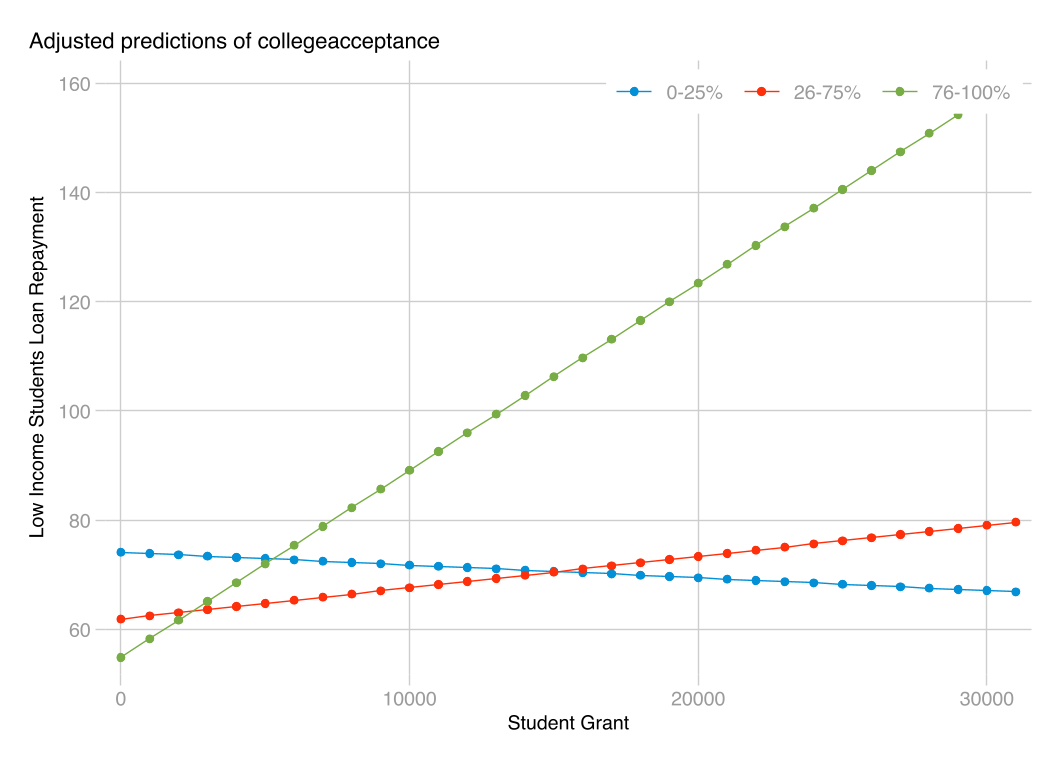

In [16]:
*Plotting margins for nominal - interval-ratio interaction terms

quietly reg y_lo_inc_rpy c.sgrnt_low_inc##i.collegeacceptance

quietly margins collegeacceptance, at(sgrnt_low_inc=(0(1000)31989)) atmeans
marginsplot, noci legend(on) xtitle("Student Grant") ///
ytitle("Low Income Students Loan Repayment") legend(rows(1) position(1) ring(0)) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    The results support both of my hypothesis. Low income loan repayment portions do decrease if students receive more state grants, and a school's acceptance rate
    does interact with state grant aids.
    
    Both schools within 26-75% and 76-100% acceptance rate categories show high chances of low income students paying off their student loans upon the condition 
    that the grants they receive increase. The only difference is that this relationship is much stronger (as we see the green line being much more steep) 
    for colleges with 76-100% acceptance rate. On the contrary, according to the blue line, the chances of low income students who are in schools with the acceptance rate of 0-25% are very unlikely to 
    pay off their student loans since the blue line shows a negative realtiosnhip downhill.
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
    Here are the co-efficients that my second regression table showed, all of which are in negative directions:
     -.0002344 sgrnt_low_~c 
     -12.22826 26-75% (red)
     -19.29332 76-100% (green)
     
     QUESTION: I tried to frame my understanding of the visualization above in part A of this question. However, I can't understand what the negativeness of those three co-efficients mean.
     Are those signifying negative relationships? because the green and red lines seem to have a positive realtionship and only the blue one indicates a negative realtionships. What do those negative
     coefficients mean?
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    
    My regression adjusted estimates from margins for my nominal independent variable (acceptance rate) and interval ration independent variable (grant aid)
    support my hypothesis which indicates the existing inequity in the higher education system. Students who are coming from low-income families need to work 
    really hard to get into highly selective schools that have very low acceptance rates. Even though low income students may receive more grant aids in such schools,
    their loan repayment portions will be very high, and they will have to work much harder and longer than students coming from rich families to pay back their loans,
    a process that prevents low-income students from timely graduation or sometimes results in them dropping out of school. The statistics in this assignment show how
    the higher education system works more in favor of high-income students and also how much higher school acceptance rates and more grant aids can help low-income
    students acquire proper and affordable education.
    